In [1]:
%matplotlib inline

import os

import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
path_img = 'train/images/'
path_mask = 'train/masks/'

In [3]:
files = []
for _, _, arquivo in os.walk(path_img):
    files.append(arquivo)
files = files[0]

In [4]:
files = np.array(files,dtype=np.str)

In [5]:
def calc_hist(p):
    imgs_sal = []
    imgs_sem_sal = []
    
    for i in files[p]:
        img_url = path_img + i
        mask_url = path_mask + i

        img = cv2.imread(img_url,0)
        mask = cv2.imread(mask_url,0)

        masked_img = cv2.bitwise_and(img,img,mask = mask)

        mask_inv = np.where(mask == 0, 255, 0)
        mask_inv = np.uint8(mask_inv)

        masked_img_inv = cv2.bitwise_and(img,img,mask = mask_inv)

        imgs_sal.append(masked_img)
        imgs_sem_sal.append(masked_img_inv)

    hist_sal = cv2.calcHist(imgs_sal,[0],None,[256],[0,256])
    hist_sem_sal = cv2.calcHist(imgs_sem_sal,[0],None,[256],[0,256])
    
    plt.plot(hist_sal[1:],label='Com Sal')
    plt.plot(hist_sem_sal[1:],label='Sem Sal')
    plt.legend()
    plt.show()

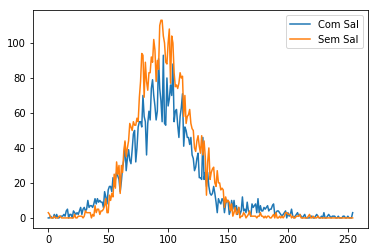

In [6]:
# Histograma de todas as 4000 imagens
v = np.arange(0,4000)
calc_hist(v)

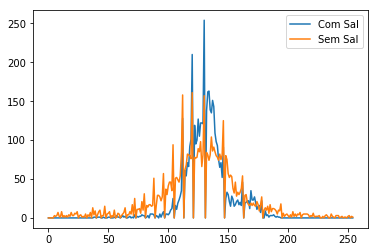

In [19]:
# Amostra aleatória de 100 imagens
v = np.random.randint(0,high=3999,size=100)
calc_hist(v)

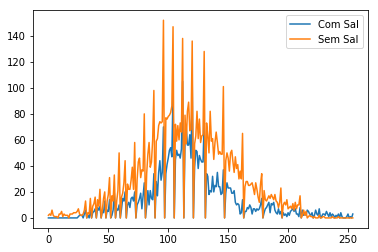

In [14]:
# Amostra aleatória de 500 imagens
v = np.random.randint(0,high=3999,size=500)
calc_hist(v)

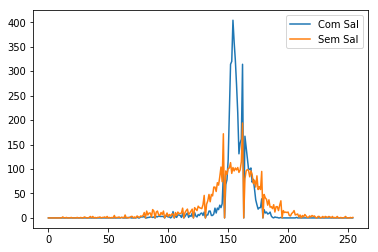

In [17]:
# Amostra aleatória de 1000 imagens
v = np.random.randint(0,high=3999,size=1000)
calc_hist(v)